In [201]:
import numpy as np
import pandas as pd
import wrangle
import itertools
from scipy import stats
import math

#from pandas_profiling import ProfileReport


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from pandas.plotting import scatter_matrix

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
import plotly.io as pio

# pd.options.display.max_columns = 186
# pd.set_option("display.max_rows", 101)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('data/training_v2.csv')

In [3]:
df = wrangle.get_training_data()

---Acquiring the Data---
rows: 91713, columns: 186


---Handling Missing Values---
Filling nulls with mode for the following features:
	 * age
	 * bmi
	 * ethnicity
Handling nulls within rows
	 * Dropping patients with no recorded gender
		 - Number of patients dropped: 25
Filling nulls with 0 (aka False) for the following columns
	 * arf_apache
	 * intubated_apache
	 * cirrhosis
	 * aids
	 * diabetes_mellitus
	 * hepatic_failure
	 * immunosuppression
	 * leukemia
	 * lymphoma
	 * solid_tumor_with_metastasis
	 * hospital_death
	 * ethnicity
	 * gender
	 * age
	 * bmi


In [4]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [86]:
df.apache_2_bodysystem.value_counts()

Cardiovascular         38806
Neurologic             11895
Respiratory            11606
Gastrointestinal        9025
Metabolic               7647
Trauma                  3836
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64

In [5]:
df.shape

(91688, 186)

In [6]:
working_df = df[['hospital_id', 'hospital_death', 'bmi', 'age', 'gender', 'ethnicity', 'solid_tumor_with_metastasis', 'lymphoma', 'leukemia', 'immunosuppression', 'hepatic_failure', 'diabetes_mellitus', 'aids', 'cirrhosis', 'intubated_apache', 'arf_apache']].copy()

In [7]:
working_df.head()

,hospital_id,hospital_death,bmi,age,gender,ethnicity,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,arf_apache
0,118,0,22.73,68.0,M,Caucasian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,81,0,27.42,77.0,F,Caucasian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,118,0,31.95,25.0,F,Caucasian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,118,0,22.64,81.0,F,Caucasian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,0,14.00,19.0,M,Caucasian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91688 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  91688 non-null  int64  
 1   hospital_death               91688 non-null  int64  
 2   bmi                          91688 non-null  float64
 3   age                          91688 non-null  float64
 4   gender                       91688 non-null  object 
 5   ethnicity                    91688 non-null  object 
 6   solid_tumor_with_metastasis  91688 non-null  float64
 7   lymphoma                     91688 non-null  float64
 8   leukemia                     91688 non-null  float64
 9   immunosuppression            91688 non-null  float64
 10  hepatic_failure              91688 non-null  float64
 11  diabetes_mellitus            91688 non-null  float64
 12  aids                         91688 non-null  float64
 13  cirrhosis       

In [9]:
working_df.isna().sum()

hospital_id                    0
hospital_death                 0
bmi                            0
age                            0
gender                         0
ethnicity                      0
solid_tumor_with_metastasis    0
lymphoma                       0
leukemia                       0
immunosuppression              0
hepatic_failure                0
diabetes_mellitus              0
aids                           0
cirrhosis                      0
intubated_apache               0
arf_apache                     0
dtype: int64

In [10]:
# sns.heatmap(working_df.drop(['hospital_id'],axis=1), annot=True, annot_kws={"size": 7})
# sns.heatmap(working_df,  nominal_columns=['hospital_id', 'gender', 'ethnicity'])

In [11]:
# working_df = working_df.astype({'patient_id': 'object'})

In [12]:
working_df = working_df.astype({'hospital_id': 'object'})

In [13]:
working_df = working_df.astype({'gender': 'object'})

In [14]:
working_df = working_df.astype({'ethnicity': 'object'})

In [15]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91688 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  91688 non-null  object 
 1   hospital_death               91688 non-null  int64  
 2   bmi                          91688 non-null  float64
 3   age                          91688 non-null  float64
 4   gender                       91688 non-null  object 
 5   ethnicity                    91688 non-null  object 
 6   solid_tumor_with_metastasis  91688 non-null  float64
 7   lymphoma                     91688 non-null  float64
 8   leukemia                     91688 non-null  float64
 9   immunosuppression            91688 non-null  float64
 10  hepatic_failure              91688 non-null  float64
 11  diabetes_mellitus            91688 non-null  float64
 12  aids                         91688 non-null  float64
 13  cirrhosis       

In [16]:
working_df.shape

(91688, 16)

In [71]:
# def cramers_corrected_stat(confusion_matrix):
#     """
#     Calculates the corrected Cramer's V statistic
    
#     Args:
#         confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
#     Returns:
#         The corrected Cramer'v V statistic
#     """
    
#     chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
    
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# cols = list(working_df.columns.values)
# corrM = np.zeros((len(cols),len(cols)))

# # Calculate s of every combination of variables
# for col1, col2 in itertools.combinations(cols, 2):

#     a, b = working_df[col1], working_df[col2]
    
#     idx1, idx2 = cols.index(col1), cols.index(col2)
#     dfObserved = pd.crosstab(a,b) 
#     corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
#     corrM[idx2, idx1] = corrM[idx1, idx2]

# corr = pd.DataFrame(corrM, index=cols, columns=cols)

# # Mask to get lower triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# # Draw the heatmap with the mask 
# fig = plt.figure(figsize=(20, 20))

# sns.heatmap(corr, mask=mask, cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
# plt.title('Cramer’s V calculated for the telco churn dataset')
# plt.show()

In [200]:
df.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [195]:
# Set alpha value
alpha = 0.05

for col in df.columns:

    a, b = df[col], df["hospital_death"]

    observed = pd.crosstab(a, b) 
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        # Reject the null hypothesis
        print("({} and hospital_death) are  dependent of each other. (p = {})".format(col, p))
    else:
         # Failed to reject the null hypothesis
        print("({} and hospital_death) are  independent of each other. (p = {})".format(col, p))

(encounter_id and hospital_death) are  independent of each other. (p = 0.4984472990249586)
(patient_id and hospital_death) are  independent of each other. (p = 0.49844729902497215)
(hospital_id and hospital_death) are  dependent of each other. (p = 4.1849665138946445e-147)
(hospital_death and hospital_death) are  dependent of each other. (p = 0.0)
(age and hospital_death) are  dependent of each other. (p = 1.196359515342852e-226)
(bmi and hospital_death) are  independent of each other. (p = 0.3628499081984528)
(elective_surgery and hospital_death) are  dependent of each other. (p = 3.40514323118526e-176)
(ethnicity and hospital_death) are  dependent of each other. (p = 0.002477606556537611)
(gender and hospital_death) are  dependent of each other. (p = 0.03441709366041668)
(height and hospital_death) are  dependent of each other. (p = 0.002402442108060369)
(hospital_admit_source and hospital_death) are  dependent of each other. (p = 8.351664221020479e-198)
(icu_admit_source and hospita

(h1_sysbp_noninvasive_max and hospital_death) are  dependent of each other. (p = 3.3759991218927526e-181)
(h1_sysbp_noninvasive_min and hospital_death) are  dependent of each other. (p = 0.0)
(h1_temp_max and hospital_death) are  dependent of each other. (p = 0.0)
(h1_temp_min and hospital_death) are  dependent of each other. (p = 0.0)
(d1_albumin_max and hospital_death) are  dependent of each other. (p = 1.960127676514452e-281)
(d1_albumin_min and hospital_death) are  dependent of each other. (p = 0.0)
(d1_bilirubin_max and hospital_death) are  dependent of each other. (p = 2.9501942675898763e-175)
(d1_bilirubin_min and hospital_death) are  dependent of each other. (p = 8.647147243647446e-153)
(d1_bun_max and hospital_death) are  dependent of each other. (p = 0.0)
(d1_bun_min and hospital_death) are  dependent of each other. (p = 0.0)
(d1_calcium_max and hospital_death) are  dependent of each other. (p = 5.990068466168162e-270)
(d1_calcium_min and hospital_death) are  dependent of eac

(apache_2_bodysystem and hospital_death) are  dependent of each other. (p = 6.011197317797345e-235)


In [74]:
# d = dict.fromkeys(['columns', 'nulls', 'ratio', 'val1', 'val'])
list = []
for c in df.columns:
    list1 = []
    val = df[df[c].notna()].hospital_death.value_counts()[1]/df[df[c].notna()].hospital_death.value_counts()[0]
    if df[c].isna().sum() > 0:
        val1 = df[df[c].isna()].hospital_death.value_counts()[1]/df[df[c].isna()].hospital_death.value_counts()[0]
        if abs(val1-val) > 0.05:
            list1.append(c)
            list1.append(df[c].isna().sum())
            list1.append(val1/val)
            list1.append(val1)
            list1.append(val)
            list1.append(df[df[c].isna()].hospital_death.value_counts()[1])


            list.append(list1)

# print(list)
#             print(f'{c}: total_nulls: {df[c].isna().sum()} , ratio: {val1/val},  val1:{val1}, val:{val}')

In [75]:
df2 = pd.DataFrame.from_records(list)

In [76]:
df2.head()

,0,1,2,3,4,5
0,height,1328,1.743245,0.162872,0.093430,186
1,albumin_apache,54361,0.592213,0.074158,0.125222,3753
2,fio2_apache,70848,0.291086,0.063002,0.216437,4199
3,gcs_eyes_apache,1898,2.257496,0.208148,0.092203,327
4,gcs_motor_apache,1898,2.257496,0.208148,0.092203,327


In [77]:
df2.columns = ['column', 'num_nulls', 'val1_val_ratio', 'null_deathrate', 'not_null_deathrate', 'null_deaths']

In [78]:
df2.sort_values(by=['not_null_deathrate'], ascending = False)

,column,num_nulls,val1_val_ratio,null_deathrate,not_null_deathrate,null_deaths
44,h1_lactate_min,84346,0.386880,0.084724,0.218994,6588
43,h1_lactate_max,84346,0.386880,0.084724,0.218994,6588
8,pao2_apache,70848,0.291086,0.063002,0.216437,4199
2,fio2_apache,70848,0.291086,0.063002,0.216437,4199
9,ph_apache,70848,0.291086,0.063002,0.216437,4199
6,paco2_apache,70848,0.291086,0.063002,0.216437,4199
7,paco2_for_ph_apache,70848,0.291086,0.063002,0.216437,4199
51,d1_pao2fio2ratio_max,65989,0.266891,0.055604,0.208341,3476
52,d1_pao2fio2ratio_min,65989,0.266891,0.055604,0.208341,3476
35,d1_lactate_max,68378,0.289880,0.060338,0.208148,3891


In [79]:
df2 = df2.drop(df2.index[[43, 6, 52, 36, 48, 50, 46, 59, 54, 55, 57, 40, 38, 18, 23, 12, 34, 33, 42, 32, 30, 15, 20, 14, 26, 22, 28, 5, 4]])

In [80]:
df2.sort_values(by=['not_null_deathrate'], ascending = False)

,column,num_nulls,val1_val_ratio,null_deathrate,not_null_deathrate,null_deaths
44,h1_lactate_min,84346,0.386880,0.084724,0.218994,6588
2,fio2_apache,70848,0.291086,0.063002,0.216437,4199
7,paco2_for_ph_apache,70848,0.291086,0.063002,0.216437,4199
8,pao2_apache,70848,0.291086,0.063002,0.216437,4199
9,ph_apache,70848,0.291086,0.063002,0.216437,4199
51,d1_pao2fio2ratio_max,65989,0.266891,0.055604,0.208341,3476
35,d1_lactate_max,68378,0.289880,0.060338,0.208148,3891
47,d1_arterial_ph_max,60108,0.249896,0.048456,0.193906,2778
49,d1_arterial_po2_max,59247,0.241366,0.046730,0.193605,2645
45,d1_arterial_pco2_max,59256,0.241849,0.046796,0.193494,2649


In [81]:
df2 = df2.reset_index()
df2 = df2.drop(columns=['index'])

In [82]:
df2

,column,num_nulls,val1_val_ratio,null_deathrate,not_null_deathrate,null_deaths
0,height,1328,1.743245,0.162872,0.093430,186
1,albumin_apache,54361,0.592213,0.074158,0.125222,3753
2,fio2_apache,70848,0.291086,0.063002,0.216437,4199
3,gcs_eyes_apache,1898,2.257496,0.208148,0.092203,327
4,paco2_for_ph_apache,70848,0.291086,0.063002,0.216437,4199
5,pao2_apache,70848,0.291086,0.063002,0.216437,4199
6,ph_apache,70848,0.291086,0.063002,0.216437,4199
7,temp_apache,4103,1.718537,0.157405,0.091592,558
8,d1_diasbp_invasive_max,67964,0.540814,0.077989,0.144208,4917
9,d1_diasbp_max,164,2.475483,0.233083,0.094156,31


In [96]:
df2.sort_values(by=['val1_val_ratio'], ascending = False)

,column,num_nulls,val1_val_ratio,null_deathrate,not_null_deathrate,null_deaths,null_death_ratio
15,d1_sysbp_max,158,2.592621,0.244094,0.094150,31,0.196203
9,d1_diasbp_max,164,2.475483,0.233083,0.094156,31,0.189024
3,gcs_eyes_apache,1898,2.257496,0.208148,0.092203,327,0.172287
13,d1_spo2_max,331,1.891008,0.177936,0.094096,50,0.151057
0,height,1328,1.743245,0.162872,0.093430,186,0.140060
7,temp_apache,4103,1.718537,0.157405,0.091592,558,0.135998
10,d1_heartrate_min,144,1.710798,0.161290,0.094278,20,0.138889
16,d1_temp_max,2320,1.705191,0.158263,0.092812,317,0.136638
12,d1_mbp_max,219,1.619526,0.152632,0.094245,29,0.132420
1,albumin_apache,54361,0.592213,0.074158,0.125222,3753,0.069038


In [94]:
df2['null_death_ratio'] = df2.null_deaths/df2.num_nulls

In [104]:
df2 = df2.sort_values(by=['val1_val_ratio'], ascending = False)

In [110]:
df2 = df2.head(9)

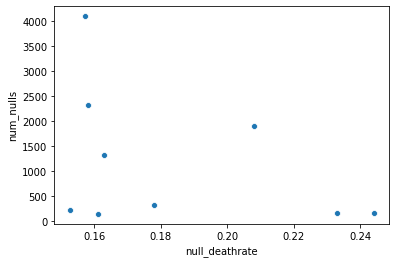

In [111]:
ax = sns.scatterplot(x="null_deathrate", y="num_nulls", data=df2)

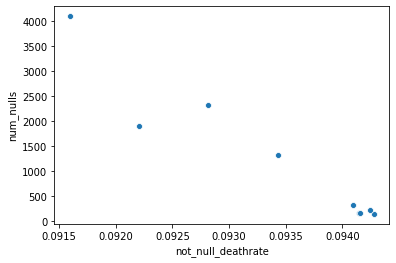

In [112]:
ax = sns.scatterplot(x="not_null_deathrate", y="num_nulls", data=df2)

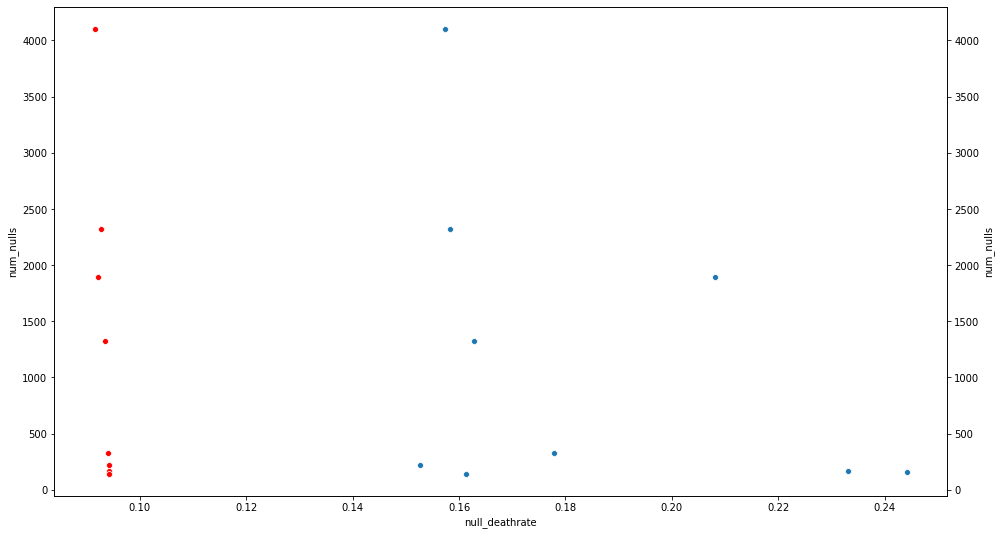

In [131]:
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='null_deathrate', y='num_nulls', data=df2, ax=ax)
ax2 = ax.twinx()
sns.scatterplot(x='not_null_deathrate', y='num_nulls', data=df2, ax=ax2, color='r')
plt.show()

In [117]:
df2_melt = df2.melt()

In [124]:
df2_melt.drop(df2_melt.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62]])

ax = sns.scatterplot(x="variable", y="num_nulls", data=df2)

,variable,value
27,null_deathrate,0.244094
28,null_deathrate,0.233083
29,null_deathrate,0.208148
30,null_deathrate,0.177936
31,null_deathrate,0.162872
32,null_deathrate,0.157405
33,null_deathrate,0.16129
34,null_deathrate,0.158263
35,null_deathrate,0.152632
36,not_null_deathrate,0.0941497


In [118]:
df2_melt

,variable,value
0,column,d1_sysbp_max
1,column,d1_diasbp_max
2,column,gcs_eyes_apache
3,column,d1_spo2_max
4,column,height
5,column,temp_apache
6,column,d1_heartrate_min
7,column,d1_temp_max
8,column,d1_mbp_max
9,num_nulls,158


In [136]:
def in_range (lowerlimit, upperlimit, value):
    return lowerlimit <= value <= upperlimit

def calculate_scores(h1max,h1min,d1max,d1min,value_ranges):
    max_score=0
    min_score=0
    hd_value=pd.Series([h1max,h1min,d1max,d1min]).dropna()
    if hd_value.empty:
        return np.nan
    else:
        max_value=max(hd_value)
        min_value=min(hd_value)
        for value_range in value_ranges:
            if in_range(value_range[0], value_range[1], max_value):
                max_score=int(value_range[2])
                break
        for value_range in value_ranges: 
            if in_range(value_range[0],value_range[1], min_value):
                min_score=int(value_range[2])
                break
        if max_score>=min_score:
            return max_score
        else:
            return min_score 

def calculate_value(h1max,h1min,d1max,d1min,value_ranges):
    max_score=0
    min_score=0
    hd_value=pd.Series([h1max,h1min,d1max,d1min]).dropna()
    if hd_value.empty:
        return np.nan
    else:
        max_value=max(hd_value)
        min_value=min(hd_value)
        for value_range in value_ranges:
            if in_range(value_range[0], value_range[1], max_value):
                max_score=int(value_range[2])
                break
        for value_range in value_ranges: 
            if in_range(value_range[0],value_range[1], min_value):
                min_score=int(value_range[2])
                break
        if max_score>=min_score:
            return max_value
        else:
            return min_value 

apache_range={'temp':([41,50,4],[39,40.9,3],[38.5,38.9,1],[36,38.4,0],[34,35.9,1],[32,33.9,2],[30,31.9,3],[19,29.9,4]),
             'heartrate':([180,300,4],[140,179,3],[110,139,2],[70,109,0],[55,69,2],[40,54,3],[0,39,4]),
             'sodium':([180,300,4],[160,179,3],[155,159,2],[150,154,1],[130,149,0],[120,129,2],[111,119,3],[50,110,4]),
             'potassium':([7,9,4],[6,6.9,3],[5.5,5.9,1],[3.5,5.4,0],[3,3.4,1],[2.5,2.9,2],[2.5,2,4]),
             'creatinine':([3.5,30,4],[2,3.4,3],[1.5,1.9,2],[0.6,1.4,0],[0,0.6,2]),
             'hematocrit':([60,100,4],[50,59.9,2],[46,49.9,1],[30,45.9,0],[20,29.9,2],[0,20,4]),
             'wbc':([40,100,4],[20,39.9,2],[15,19.9,1],[3,14.9,0],[1,2.9,2],[0,1,4]),
             'ph':([7.7,9.0,4],[7.6,7.69,3],[7.5,7.59,1],[7.33,7.49,0],[7.25,7.32,2],[7.15,7.24,3],[5,7.15,4]),
             'resprate':([50,100,4],[35,49,3],[25,34,2],[12,24,0],[10,11,1],[6,9,2],[0,5,4])}

In [185]:
tmp= df[df.pre_icu_los_days < 0]

In [187]:
tmp

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
294,95653,64810,83,0,74.0,44.370252,0,Caucasian,F,149.90,Emergency Department,Accident & Emergency,95,admit,Med-Surg ICU,-0.132639,0,99.70,NaN,110.0,104.01,0,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,193.0,65.0,NaN,0.0,108.0,NaN,NaN,NaN,NaN,48.0,NaN,37.7,NaN,0.0,NaN,NaN,NaN,80.0,56.0,80.0,56.0,84.0,60.0,NaN,NaN,108.0,91.0,108.0,91.0,38.0,16.0,98.0,92.0,NaN,NaN,179.0,132.0,179.0,132.0,38.2,36.7,NaN,NaN,70.0,60.0,70.0,60.0,73.0,65.0,NaN,NaN,108.0,108.0,108.0,108.0,31.0,20.0,97.0,94.0,NaN,NaN,165.0,143.0,165.0,143.0,38.2,37.7,NaN,NaN,NaN,NaN,71.0,71.0,8.7,8.7,3.21,3.21,240.0,155.0,23.0,23.0,9.8,9.8,32.3,32.3,3.8,3.8,NaN,NaN,157.0,157.0,4.5,4.5,136.0,136.0,13.50,13.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Cardiovascular,Cardiovascular
310,105080,29703,118,0,73.0,14.000000,0,Caucasian,M,167.60,Di

In [240]:
female_age_death = (
    df[df["gender"] == "F"][["age", "hospital_death"]]
    .groupby("age")
    .mean()
    .reset_index()
)
male_age_death = (
    df[df["gender"] == "M"][["age", "hospital_death"]]
    .groupby("age")
    .mean()
    .reset_index()
)
from plotly.subplots import make_subplots

fig = make_subplots()
fig.add_trace(
    go.Scatter(
        x=female_age_death["age"], y=female_age_death["hospital_death"], name="Female patients"
    )
)
fig.add_trace(
    go.Scatter(
        x=male_age_death["age"], y=male_age_death["hospital_death"], name="Male patients"
    )
)
fig.update_layout(title_text="<b>Average Hospital Death Probability By Gender<b>")
fig.update_xaxes(title_text="<b>Patient Age<b>")
fig.update_yaxes(title_text="<b>Average Hospital Death</b>", secondary_y=False)
fig.show()

# Uncomment this code to create the HTML file to embed chart
#pio.write_html(fig, file='index.html', auto_open=True)

In [217]:
df.icu_type.value_counts()

Med-Surg ICU    50565
MICU             7695
Neuro ICU        7672
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4612
CTICU            4003
Name: icu_type, dtype: int64

In [231]:
ICU_type = df[["icu_type", "age", "hospital_death"]]
ICU_type["icu_type"] = ICU_type["icu_type"].replace(
    {
        "Med-Surg ICU": "Medical Surgical ICU",
        "MICU": "Medical ICU",
        "Neuro ICU": "Neurology ICU",
        "CCU-CTICU": "Cardiothoracic ICU",
        "CTICU": "Cardiothoracic ICU",
        "SICU": "Surgical ICU ",
        "CSICU": "Cardiac Surgery ICU",
    }
)
# ICU_type['pre_icu_los_days']=ICU_type['pre_icu_los_days'].round(0)
ICU_df = ICU_type.groupby(["icu_type", "age"]).mean().reset_index()
ICU_df["count"] = (
    ICU_type.groupby(["icu_type", "age"]).count().reset_index()["hospital_death"]
)

fig = px.scatter(
    ICU_df,
    x="age",
    y="hospital_death",
    size="count",
    color="icu_type",
    hover_name="icu_type",
    log_x=False,
    size_max=60,
)

fig.update_layout(legend_title_text='ICU Type')
fig.update_layout(title_text="<b>Survival rate at different types of ICU<b>")
fig.update_yaxes(title_text="<b>Average Hospital Death<b>")
fig.update_xaxes(title_text="<b>Age<b>")
fig.show()

# Uncomment this code to create the HTML file to embed chart
#pio.write_html(fig, file='index.html', auto_open=True)

In [236]:
ICU_day = df[df["pre_icu_los_days"] >= 0][
    ["icu_type", "pre_icu_los_days", "hospital_death"]
]
ICU_day["icu_type"] = ICU_type["icu_type"].replace(
    {
        "MICU": "Medical ICU",
        "Neuro ICU": "Neurology ICU",
        "CCU-CTICU": "Cardiothoracic ICU",
        "CTICU": "Cardiothoracic ICU",
        "SICU": "Surgical ICU ",
        "CSICU": "Cardiac Surgery ICU",
        "Med-Surg ICU": "Medical Surgical ICU"
    }
)
ICU_day["pre_icu_los_days"] = ICU_day["pre_icu_los_days"].round(0)
ICU_df = ICU_day.groupby(["icu_type", "pre_icu_los_days"]).mean().reset_index()
ICU_df["count"] = (
    ICU_day.groupby(["icu_type", "pre_icu_los_days"])
    .sum()
    .reset_index()["hospital_death"]
)

fig = px.scatter(
    ICU_df,
    x="pre_icu_los_days",
    y="hospital_death",
    size="count",
    color="icu_type",
    hover_name="icu_type",
    log_x=True,
    size_max=200,
)

fig.update_layout(legend_title_text='ICU Type')
fig.update_layout(
    title_text="<b>Survival rate at different length of stay before ICU admission<b>"
)
fig.update_yaxes(title_text="<b>Average Hospital Death<b>")
fig.update_xaxes(
    title_text="<b>The length of stay of the patient between hospital admission and unit admission <b>"
)
fig.show()

# Uncomment this code to create the HTML file to embed chart
#pio.write_html(fig, file='index.html', auto_open=True)

In [203]:
apache3=df[['age','apache_3j_bodysystem','hospital_death']]
apache3=apache3.groupby(['apache_3j_bodysystem','age']).agg(['size','mean']).reset_index()

apache3['size']=apache3['hospital_death']['size']
apache3['mean']=apache3['hospital_death']['mean']

apache3.drop('hospital_death',axis=1,inplace=True)

systems = apache3['apache_3j_bodysystem'].unique().tolist()
data = []
list_updatemenus = []
for n, s in enumerate(systems):
    visible = [False] * len(systems)
    visible[n] = True
    temp_dict = dict(label = str(s),
                 method = 'update',
                 args = [{'visible': visible},
                         {'title': '<b>'+s+'<b>'}])
    list_updatemenus.append(temp_dict)
    

for s in systems:
    mask = (apache3['apache_3j_bodysystem'].values == s) 
    trace = (dict(visible = False,     
        x = apache3.loc[mask, 'age'],
        y = apache3.loc[mask, 'mean'],
        mode = 'markers',
        marker = {'size':apache3.loc[mask, 'size']/apache3.loc[mask,'size'].sum()*1000,
                 'color':apache3.loc[mask, 'mean'],
                 'showscale': True})
                   )
    data.append(trace)

data[0]['visible'] = True

layout = dict(
    updatemenus=[dict(buttons=list_updatemenus)],
    xaxis=dict(
        title="<b>Age<b>",
        range=[min(apache3.loc[:, "age"]) - 10, max(apache3.loc[:, "age"]) + 10],
    ),
    yaxis=dict(
        title="<b>Average Hospital Death<b>",
        range=[min(apache3.loc[:, "mean"]) - 0.1, max(apache3.loc[:, "mean"]) + 0.1],
    ),
    title="<b>Survival Rate<b>",
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')

# Uncomment this code to create the HTML file to embed chart
#pio.write_html(fig, file='index.html', auto_open=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [158]:
[dict(buttons = list_updatemenus)]

AttributeError: 'list' object has no attribute 'tolist'

In [156]:
dict(updatemenus=[dict(buttons = list_updatemenus)])

AttributeError: 'list' object has no attribute 'tolist'

In [141]:
[apache3['apache_3j_bodysystem'].unique()]

[array(['Cardiovascular', 'Gastrointestinal', 'Genitourinary',
        'Gynecological', 'Hematological', 'Metabolic',
        'Musculoskeletal/Skin', 'Neurological', 'Respiratory', 'Sepsis',
        'Trauma'], dtype=object)]

In [150]:
systems

['Cardiovascular',
 'Gastrointestinal',
 'Genitourinary',
 'Gynecological',
 'Hematological',
 'Metabolic',
 'Musculoskeletal/Skin',
 'Neurological',
 'Respiratory',
 'Sepsis',
 'Trauma']

In [148]:
tolist

NameError: name 'tolist' is not defined